<a href="https://colab.research.google.com/github/atahantekcan/precision_farming/blob/main/PCA_analysis_and_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA & PCR

The primary explanation for this is that the PCA, which involves dissecting the variance structure of the variable, is made to function better with numerical or continuous variables. PCA won't be effective with categorical variables since they lack a variance structure (they are not numerical).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [2]:
df = pd.read_csv("Crop_recommendation.csv")

PCA

In [3]:
# w 2 components
pca=PCA(n_components=2)
df_pca=pca.fit_transform(df.drop(['label'],axis=1))
df_pca=pd.DataFrame(df_pca)
fig = px.scatter(x=df_pca[0],y=df_pca[1],color=df['label'],title= f"Decomposed using PCA Variance Explained : {pca.explained_variance_ratio_.sum() * 100}%")
fig.show()

In [4]:
# w 3 components
pca3=PCA(n_components=3)
df_pca3=pca3.fit_transform(df.drop(['label'],axis=1))
df_pca3=pd.DataFrame(df_pca3)
fig = px.scatter_3d(x=df_pca3[0],y=df_pca3[1],z=df_pca3[2],color=df['label'],title=f"Variance Explained : {pca3.explained_variance_ratio_.sum() * 100}%")
fig.show()

In [5]:
fig = px.scatter(x=df['rainfall'],y=df['temperature'],color=df['label'])
fig.show()

In [7]:
df_ = pd.read_csv("Crop_recommendation.csv")

In [8]:
# Principal Component Analysis
df = df_
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "label" not in col]
df[num_cols].head()
df = df[num_cols]
df = pd.DataFrame(StandardScaler().fit_transform(df))

pca = PCA()
pca_fit = pca.fit_transform(df)

pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)

array([0.27588831, 0.46073263, 0.61451966, 0.76064697, 0.8757796 ,
       0.97243126, 1.        ])

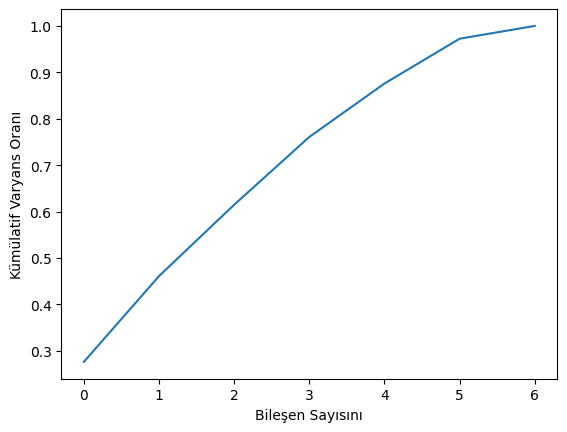

In [10]:
# Optimum Bileşen Sayısı
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısını")
plt.ylabel("Kümülatif Varyans Oranı")
plt.show()

In [11]:
# Final PCA'in Oluşturulması
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)

pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)

array([0.27588831, 0.46073263, 0.61451966])

PCR

In [12]:
# Principal Component Regression
df=df_
len(pca_fit)
len(num_cols)

others = [col for col in df.columns if col not in num_cols]
df[others].head()

,label
0,rice
1,rice
2,rice
3,rice
4,rice


In [13]:
pd.DataFrame(pca_fit, columns=["PC1","PC2", "PC3"]).head()

,PC1,PC2,PC3
0,-0.583,-0.845,1.373
1,-0.475,-0.785,1.252
2,-0.634,-0.695,1.179
3,-1.048,-1.088,1.393
4,-0.873,-0.659,1.456


In [14]:
final_df = pd.concat([pd.DataFrame(pca_fit, columns=["PC1","PC2", "PC3"]),
                      df[others]], axis=1)
final_df.head()

,PC1,PC2,PC3,label
0,-0.583,-0.845,1.373,rice
1,-0.475,-0.785,1.252,rice
2,-0.634,-0.695,1.179,rice
3,-1.048,-1.088,1.393,rice
4,-0.873,-0.659,1.456,rice


In [15]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

final_df = label_encoder(final_df, "label")

y = final_df["label"]
X = final_df.drop(["label"], axis=1)

lm = LinearRegression()
rmse = np.mean(np.sqrt(-cross_val_score(lm, X, y, cv=5, scoring="neg_mean_squared_error")))

In [16]:
rmse

7.499873049002578

In [17]:
y.mean()

10.5

In [18]:
cart = DecisionTreeRegressor()
rmse = np.mean(np.sqrt(-cross_val_score(cart, X, y, cv=5, scoring="neg_mean_squared_error")))

In [19]:
rmse

8.982931766022567

In [20]:
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}

# GridSearchCV
cart_best_grid = GridSearchCV(cart,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=True).fit(X, y)

cart_final = DecisionTreeRegressor(**cart_best_grid.best_params_, random_state=17).fit(X, y)

rmse = np.mean(np.sqrt(-cross_val_score(cart_final, X, y, cv=5, scoring="neg_mean_squared_error")))

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [21]:
rmse

7.425299540961523